In [1]:
# PUT CUSTOM FUNCTIONS AT TOP SO WE CAN TRANSFER TO A SEPARATE PYTHON FILE

def get_metrics_smoted(model):
    '''
    model = instantiated instace of classifier
    '''

    model.fit(X_tr_sm, y_tr_sm)
    y_pred = model.predict(X_te_final_sc)
    
    return print(confusion_matrix(y_test, y_pred), '\n', 
                 classification_report(y_test, y_pred))

In [2]:
# copy & paste this cell in new notebook 
# to have all the libraries we're working with
# and the og data, modified df, X (feature vars) and y (target var)

# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter # for sorting a list of tuples based on the second element of ea tuple.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE

In [3]:
# importing ohe'd & scaled X_train/X_test as dataframes
# importing y_train and test as series

X_tr_final_sc = pd.read_csv('../../src/data/X_tr_final_sc_seeded_42.csv', index_col=0)
X_te_final_sc = pd.read_csv('../../src/data/X_te_final_sc_seeded_42.csv', index_col=0)

y_train = pd.read_csv('../../src/data/y_train_seeded_42.csv', index_col=0, squeeze=True)
y_test = pd.read_csv('../../src/data/y_test_seeded_42.csv', index_col=0, squeeze=True)

# print('train datasets: ', X_tr_final_sc.shape, y_train.shape)
# print('test datasets: ', X_te_final_sc.shape, y_test.shape)


# SMOTE

sm1 = SMOTE(random_state=42)
X_tr_sm, y_tr_sm = sm1.fit_resample(X_tr_final_sc, y_train)

# print("SMOTE'd train datasets: ", X_tr_final_smoted.shape, y_tr_smoted.shape)
# print(y_tr_smoted.value_counts())

In [4]:
# removing following columns:
# 'number vmail messages'
# 'total day minutes'
# 'total eve minutes'
# 'total night minutes'

dropped1 = 'number vmail messages'
dropped4 = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
# dropped5 = ['total day minutes', 'total eve minutes', 
#             'total night minutes', 'total intl minutes'], & all states
# dropped 5 is for the final forest model were max f1, precision, recall.

X_tr_dropped1 = X_tr_final_sc.drop(dropped1, axis=1)
X_te_dropped1 = X_te_final_sc.drop(dropped1, axis=1)

X_tr_dropped4 = X_tr_final_sc.drop(dropped4, axis=1)
X_te_dropped4 = X_te_final_sc.drop(dropped4, axis=1)

sm2 = SMOTE(random_state=42)
X_tr_dropped1_sm, y_tr_dropped1_sm = sm2.fit_resample(X_tr_dropped1, y_train)

sm3 = SMOTE(random_state=42)
X_tr_dropped4_sm, y_tr_dropped4_sm = sm3.fit_resample(X_tr_dropped4, y_train)

---

# Random Forest

#### ---

## forest1
- fsm w/ SMOTE'd data

In [5]:
forest1 = RandomForestClassifier(random_state=42)

get_metrics_smoted(forest1)

NameError: name 'get_metrics_smoted' is not defined

#### ---

## forest2
- gridsearch

In [ ]:
forest2 = RandomForestClassifier(random_state=42)

In [ ]:
grid_forest2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [20, 15, 10, 7, 5],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [50, 100, 200]
}

forest2_gridsearch = GridSearchCV(forest2, grid_forest2, cv=3)

forest2_gridsearch.fit(X_tr_sm, y_tr_sm)

print(forest2_gridsearch.best_params_, '\n', forest2_gridsearch.best_score_)

In [ ]:
# params from my grid search

forest2_grd = RandomForestClassifier(criterion= 'gini', 
                                     max_depth= 20, 
                                     max_features= 0.5, 
                                     min_samples_split= 5, 
                                     n_estimators= 100, 
                                     random_state=42)

get_metrics_smoted(forest2_grd)

In [ ]:
# hunters params from his grid search

forest2_hunter1 = RandomForestClassifier(criterion= 'gini', max_features= 0.5, 
                                             n_estimators= 200, random_state= 42)

get_metrics_smoted(forest2_hunter1)

In [ ]:
# final params hunter settled on

forest2_hunter2 = RandomForestClassifier(max_features=0.5, random_state=42)
get_metrics_smoted(forest2_hunter2)

In [ ]:
forest2_hunter2_summary = list(zip(X_tr_sm.columns, forest2_hunter2.feature_importances_))
forest2_hunter2_summary = sorted(forest2_hunter2_summary,key=itemgetter(1), reverse=True)

forest2_hunter2_ylabel = [i[0] for i in forest2_hunter2_summary][:5]
forest2_hunter2_xlabel = [i[1] for i in forest2_hunter2_summary][:5]

fig, ax = plt.subplots()
ax.barh(forest2_hunter2_ylabel, forest2_hunter2_xlabel)
ax.invert_yaxis()

#### ---

## forest3
- dropped1_sm

In [ ]:
forest3_grd = RandomForestClassifier(criterion= 'gini', 
                                     max_depth= 20, 
                                     max_features= 0.5, 
                                     min_samples_split= 5, 
                                     n_estimators= 100, 
                                     random_state=42)

forest3_grd.fit(X_tr_dropped1_sm, y_tr_dropped1_sm)
forest3_grd_y_pred = forest3_grd.predict(X_te_dropped1)

print(confusion_matrix(y_test, forest3_grd_y_pred))

print(classification_report(y_test, forest3_grd_y_pred))

In [ ]:
forest3_hunter1 = RandomForestClassifier(criterion= 'gini', max_features= 0.5, 
                                             n_estimators= 200, random_state= 42)

forest3_hunter1.fit(X_tr_dropped1_sm, y_tr_dropped1_sm)
forest3_hunter1_y_pred = forest3_hunter1.predict(X_te_dropped1)

print(confusion_matrix(y_test, forest3_hunter1_y_pred))

print(classification_report(y_test, forest3_hunter1_y_pred))

In [ ]:
forest3_hunter2 = RandomForestClassifier(max_features=0.5, random_state=42)

forest3_hunter2.fit(X_tr_dropped1_sm, y_tr_dropped1_sm)
forest3_hunter2_y_pred = forest3_hunter2.predict(X_te_dropped1)

print(confusion_matrix(y_test, forest3_hunter2_y_pred))

print(classification_report(y_test, forest3_hunter2_y_pred))

In [ ]:
# comparing to our best model forest2_hunter2

get_metrics_smoted(forest2_hunter2)

#### ---

## forest4
- dropped4_sm

In [6]:
forest4_grd = RandomForestClassifier(criterion= 'gini', 
                                     max_depth= 20, 
                                     max_features= 0.5, 
                                     min_samples_split= 5, 
                                     n_estimators= 100, 
                                     random_state=42)

forest4_grd.fit(X_tr_dropped4_sm, y_tr_dropped4_sm)
forest4_grd_y_pred = forest4_grd.predict(X_te_dropped4)

print(confusion_matrix(y_test, forest4_grd_y_pred))

print(classification_report(y_test, forest4_grd_y_pred))

[[686  23]
 [ 29  96]]
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       709
        True       0.81      0.77      0.79       125

    accuracy                           0.94       834
   macro avg       0.88      0.87      0.88       834
weighted avg       0.94      0.94      0.94       834



In [7]:
forest4_hunter1 = RandomForestClassifier(criterion= 'gini', max_features= 0.5, 
                                             n_estimators= 200, random_state= 42)

forest4_hunter1.fit(X_tr_dropped4_sm, y_tr_dropped4_sm)
forest4_hunter1_y_pred = forest4_hunter1.predict(X_te_dropped4)

print(confusion_matrix(y_test, forest4_hunter1_y_pred))

print(classification_report(y_test, forest4_hunter1_y_pred))

[[689  20]
 [ 27  98]]
              precision    recall  f1-score   support

       False       0.96      0.97      0.97       709
        True       0.83      0.78      0.81       125

    accuracy                           0.94       834
   macro avg       0.90      0.88      0.89       834
weighted avg       0.94      0.94      0.94       834



In [8]:
forest4_hunter2 = RandomForestClassifier(max_features=0.5, random_state=42)

forest4_hunter2.fit(X_tr_dropped4_sm, y_tr_dropped4_sm)
forest4_hunter2_y_pred = forest4_hunter2.predict(X_te_dropped4)

print(confusion_matrix(y_test, forest4_hunter2_y_pred))

print(classification_report(y_test, forest4_hunter2_y_pred))

[[689  20]
 [ 28  97]]
              precision    recall  f1-score   support

       False       0.96      0.97      0.97       709
        True       0.83      0.78      0.80       125

    accuracy                           0.94       834
   macro avg       0.90      0.87      0.88       834
weighted avg       0.94      0.94      0.94       834



In [21]:
from operator import itemgetter

forest4_hunter2_summary = list(zip(X_tr_dropped4_sm.columns, forest4_hunter2.feature_importances_))
forest4_hunter2_summary = sorted(forest4_hunter2_summary,key=itemgetter(1), reverse=True)
forest4_hunter2_summary

forest4_hunter2_ylabel = [i[0] for i in forest4_hunter2_summary][:5]
forest4_hunter2_xlabel = [i[1] for i in forest4_hunter2_summary][:5]

fig, ax = plt.subplots()
ax.barh(forest4_hunter2_ylabel, forest4_hunter2_xlabel)
ax.invert_yaxis()

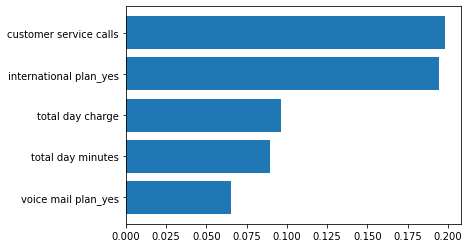

In [22]:
# checking with our best model yet: forest2_hunter2

forest2_hunter2_summary = list(zip(X_tr_sm.columns, forest2_hunter2.feature_importances_))
forest2_hunter2_summary = sorted(forest2_hunter2_summary,key=itemgetter(1), reverse=True)

forest2_hunter2_ylabel = [i[0] for i in forest2_hunter2_summary][:5]
forest2_hunter2_xlabel = [i[1] for i in forest2_hunter2_summary][:5]

fig, ax = plt.subplots()
ax.barh(forest2_hunter2_ylabel, forest2_hunter2_xlabel)
ax.invert_yaxis()

#### ---

## forest5
- refitting for f1, recall, precision
- dropping columns total day minutes, total even minutes, total night minutes, total intl minutes, state

#### Dropping columns from smoted train

In [31]:
X_tr_sm.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,-1.404508,-0.584700,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,1.069609,0.004940,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418
1,0.366388,-0.584700,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,2.214376,0.670832,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418
2,0.518179,1.685101,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,-0.077125,-0.763398,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,1.635543
3,2.010792,-0.584700,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,-0.322994,-0.660953,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418
4,0.290493,-0.584700,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,-1.186487,0.056162,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418


In [34]:
print(len(X_tr_sm.columns))
X_tr_sm.columns

67


Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_W

In [36]:
X_tr_sm_state_cols = [c for c in X_tr_sm.columns if c[:5] == 'state']
X_tr_sm_state_cols

['state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'state_WY']

In [45]:
X_tr_sm_dropped5 = X_tr_sm.drop(X_tr_sm_state_cols, axis=1)
X_tr_sm_dropped5 = X_tr_sm_dropped5.drop(dropped4, axis=1)
X_tr_sm_dropped5.shape

(4282, 13)

In [46]:
y_tr_sm_dropped5 = y_tr_sm

#### Dropping columns from test dataset

In [32]:
X_te_final_sc.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
438,0.315791,-0.5847,-0.462675,-0.372733,-0.462730,2.562862,0.301688,2.562574,-0.220713,1.183057,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,6.430858,-0.327448,-0.611418
2674,-0.847941,-0.5847,-1.311946,0.829797,-1.311676,0.326524,1.198556,0.326702,-0.240382,2.105062,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
1345,-0.063687,-0.5847,-3.330584,-5.032539,-3.330643,-0.815352,1.497512,-0.814476,-0.659343,-0.609730,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
1957,1.175941,-0.5847,0.606778,-1.074209,0.607160,0.063774,-0.445702,0.064068,-0.873741,0.670832,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
2148,-0.114284,-0.5847,-0.666204,0.078216,-0.666259,0.470740,-1.342571,0.470802,0.532630,-0.456063,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,6.430858,-0.327448,-0.611418


In [33]:
print(len(X_te_final_sc.columns))
X_te_final_sc

67


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
438,0.315791,-0.584700,-0.462675,-0.372733,-0.462730,2.562862,0.301688,2.562574,-0.220713,1.183057,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,6.430858,-0.327448,-0.611418
2674,-0.847941,-0.584700,-1.311946,0.829797,-1.311676,0.326524,1.198556,0.326702,-0.240382,2.105062,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
1345,-0.063687,-0.584700,-3.330584,-5.032539,-3.330643,-0.815352,1.497512,-0.814476,-0.659343,-0.609730,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
1957,1.175941,-0.584700,0.606778,-1.074209,0.607160,0.063774,-0.445702,0.064068,-0.873741,0.670832,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
2148,-0.114284,-0.584700,-0.666204,0.078216,-0.666259,0.470740,-1.342571,0.470802,0.532630,-0.456063,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,6.430858,-0.327448,-0.611418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,1.783105,-0.584700,-0.786471,0.479059,-0.785982,-0.054760,0.451166,-0.054466,1.811150,1.592837,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
1586,-0.291373,-0.584700,-1.807817,-1.174420,-1.807982,-0.665209,-0.993789,-0.665728,-0.116464,-1.531735,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,-0.611418
3068,-0.569657,0.952907,-0.359060,-0.773577,-0.359332,0.439131,-1.043615,0.438263,-1.507100,-0.404840,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,1.635543
2484,1.024150,2.270856,-1.167625,1.330852,-1.168008,1.494082,-0.595181,1.493446,1.756076,1.285502,...,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500,-0.327448,1.635543


In [44]:
X_te_dropped5 = X_te_final_sc.drop(X_tr_sm_state_cols, axis=1)
X_te_dropped5 = X_te_dropped5.drop(dropped4, axis=1)
X_te_dropped5.shape

(834, 13)

#### recall

In [25]:
# recall

{'rf__max_depth': 5,
 'rf__max_features': 0.5,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 300}

{'rf__max_depth': 5,
 'rf__max_features': 0.5,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 300}

In [49]:
X_tr_sm_dropped5.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,-1.404508,-0.584700,1.330852,-1.884170,0.401340,1.037905,0.004940,1.071757,-0.595235,2.767357,-0.427903,-0.327448,-0.611418
1,0.366388,-0.584700,0.529165,0.293703,0.401340,0.517286,0.670832,2.212569,-1.417963,1.045965,0.324616,-0.327448,-0.611418
2,0.518179,1.685101,-1.875896,1.056666,0.849774,0.094283,-0.763398,-0.077797,0.227493,-0.053077,1.829653,-0.327448,1.635543
3,2.010792,-0.584700,1.681590,-0.679320,0.650470,-0.403094,-0.660953,-0.322569,-0.183871,-0.053077,-0.427903,-0.327448,-0.611418
4,0.290493,-0.584700,1.080325,0.484172,-0.296224,-0.719184,0.056162,-1.188013,1.050221,0.834102,1.077134,-0.327448,-0.611418


In [50]:
X_tr_sm_dropped5.shape

(4282, 13)

In [52]:
y_tr_sm_dropped5.shape

(4282,)

In [54]:
X_te_dropped5.head()
X_te_dropped5.shape

(834, 13)

[[651  58]
 [ 24 101]]
              precision    recall  f1-score   support

       False       0.96      0.92      0.94       709
        True       0.64      0.81      0.71       125

    accuracy                           0.90       834
   macro avg       0.80      0.86      0.83       834
weighted avg       0.92      0.90      0.91       834



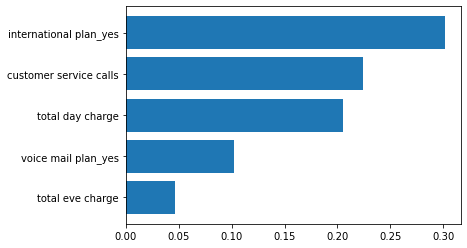

In [58]:
forest5_recall = RandomForestClassifier(max_depth=5, max_features=0.5, min_samples_split=3, n_estimators= 300,
                                       random_state=42)

forest5_recall.fit(X_tr_sm_dropped5, y_tr_sm_dropped5)
forest5_recall_y_pred = forest5_recall.predict(X_te_dropped5)

print(confusion_matrix(y_test, forest5_recall_y_pred))

print(classification_report(y_test, forest5_recall_y_pred))

forest5_recall_summary = list(zip(X_tr_sm_dropped5.columns, forest5_recall.feature_importances_))
forest5_recall_summary = sorted(forest5_recall_summary,key=itemgetter(1), reverse=True)

forest5_recall_ylabel = [i[0] for i in forest5_recall_summary][:5]
forest5_recall_xlabel = [i[1] for i in forest5_recall_summary][:5]

fig, ax = plt.subplots()
ax.barh(forest5_recall_ylabel, forest5_recall_xlabel)
ax.invert_yaxis()

#### f1

In [26]:
# f1

{'rf__max_depth': 25,
 'rf__max_features': 0.5,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 100}

{'rf__max_depth': 25,
 'rf__max_features': 0.5,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 100}

[[686  23]
 [ 24 101]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       709
        True       0.81      0.81      0.81       125

    accuracy                           0.94       834
   macro avg       0.89      0.89      0.89       834
weighted avg       0.94      0.94      0.94       834



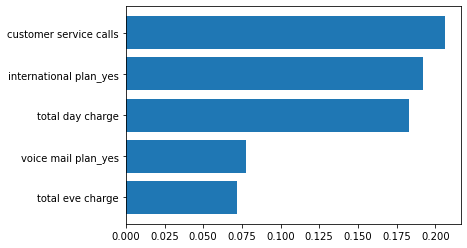

In [59]:
forest5_f1 = RandomForestClassifier(max_depth=25, max_features=0.5, min_samples_split=3, n_estimators= 100, 
                                    random_state=42)

forest5_f1.fit(X_tr_sm_dropped5, y_tr_sm_dropped5)
forest5_f1_y_pred = forest5_f1.predict(X_te_dropped5)

print(confusion_matrix(y_test, forest5_f1_y_pred))

print(classification_report(y_test, forest5_f1_y_pred))

forest5_f1_summary = list(zip(X_tr_sm_dropped5.columns, forest5_f1.feature_importances_))
forest5_f1_summary = sorted(forest5_f1_summary,key=itemgetter(1), reverse=True)

forest5_f1_ylabel = [i[0] for i in forest5_f1_summary][:5]
forest5_f1_xlabel = [i[1] for i in forest5_f1_summary][:5]

fig, ax = plt.subplots()
ax.barh(forest5_f1_ylabel, forest5_f1_xlabel)
ax.invert_yaxis()

#### precision

In [28]:
# precision

{'rf__max_depth': 25,
 'rf__max_features': 0.5,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 100}

{'rf__max_depth': 25,
 'rf__max_features': 0.5,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 100}

[[686  23]
 [ 24 101]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       709
        True       0.81      0.81      0.81       125

    accuracy                           0.94       834
   macro avg       0.89      0.89      0.89       834
weighted avg       0.94      0.94      0.94       834



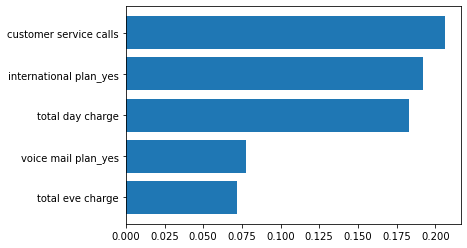

In [60]:
forest5_precision = RandomForestClassifier(max_depth=25, max_features=0.5, min_samples_split=3, n_estimators= 100,
                                       random_state=42)

forest5_precision.fit(X_tr_sm_dropped5, y_tr_sm_dropped5)
forest5_precision_y_pred = forest5_precision.predict(X_te_dropped5)

print(confusion_matrix(y_test, forest5_precision_y_pred))

print(classification_report(y_test, forest5_precision_y_pred))

forest5_precision_summary = list(zip(X_tr_sm_dropped5.columns, forest5_precision.feature_importances_))
forest5_precision_summary = sorted(forest5_precision_summary,key=itemgetter(1), reverse=True)

forest5_precision_ylabel = [i[0] for i in forest5_precision_summary][:5]
forest5_precision_xlabel = [i[1] for i in forest5_precision_summary][:5]

fig, ax = plt.subplots()
ax.barh(forest5_precision_ylabel, forest5_precision_xlabel)
ax.invert_yaxis()

In [23]:
# how do we check for overfitting?
# how come 'total day minutes' and 'total day charge' have such a high predicting influence on our model?